<a href="https://colab.research.google.com/github/Alexis-Machado/EA3-Optimizacion-procesos-de-desarrollo/blob/feature%2FAlexis/AlexisMachado_EA3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests  # Para realizar peticiones HTTP
from bs4 import BeautifulSoup  # Para analizar contenido HTML
import pandas as pd  # Para manipulación de datos
from tabulate import tabulate  # Para mostrar tablas en consola
import time  # Para añadir retrasos
import re  # Para trabajar con expresiones regulares
import matplotlib.pyplot as plt  # Para gráficos
import seaborn as sns  # Para visualizaciones atractivas
from wordcloud import WordCloud  # Para nubes de palabras
from tqdm import tqdm  # Barra de progreso
import numpy as np # NumPy para operaciones numéricas y manejo de matrices.

# Configuración de gráficos
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Lista de URLs de Celulares
product_urls = [
    'https://www.mercadolibre.com.co/celular-xiaomi-redmi-note-10s-128gb-6gb-azul-color-azul-oceano/p/MCO18027045?pdp_filters=item_id:MCO657867729#is_advertising=true&searchVariation=MCO18027045&position=2&search_layout=stack&type=pad&tracking_id=a8b65aed-ff78-4b7c-a5d6-32d078db8d01&is_advertising=true&ad_domain=VQCATCORE_LST&ad_position=2&ad_click_id=ZjgxZTYxNTYtZmI0My00M2VlLTg3N2QtZjQxZDZkOTNjNjNj',
    'https://www.mercadolibre.com.co/celular-xiaomi-redmi-note-13-pro-4g-256-gb-8-ram-color-verde-oscuro/p/MCO29901348#polycard_client=search-nordic&searchVariation=MCO29901348&position=3&search_layout=stack&type=product&tracking_id=1ada35b5-f1b5-4cd0-9aad-a2d4f8c65450&wid=MCO1463601279&sid=search',
    'https://www.mercadolibre.com.co/xiaomi-redmi-9c-dual-sim-64-gb-purpura-lavanda-3-gb-ram/p/MCO19174504#polycard_client=search-nordic&searchVariation=MCO19174504&position=4&search_layout=stack&type=product&tracking_id=9cc81439-1404-4426-bbb4-3e9431f8e892&wid=MCO1072530486&sid=search',
    'https://www.mercadolibre.com.co/celular-xiaomi-redmi-note-8-2021-64g-4gb-space-black/p/MCO15188552#polycard_client=search-nordic&searchVariation=MCO15188552&position=2&search_layout=stack&type=product&tracking_id=f23df56c-7648-4572-b323-e4effb5533d6&wid=MCO2017928956&sid=search',
    'https://www.mercadolibre.com.co/xiaomi-redmi-note-13-4g-dual-sim-256-gb-negro-8-gb-ram/p/MCO29751162#polycard_client=search-nordic&searchVariation=MCO29751162&position=6&search_layout=stack&type=product&tracking_id=520332f2-a22b-4bff-bade-e37155f12ef2&wid=MCO1463626145&sid=search',
    'https://www.mercadolibre.com.co/xiaomi-redmi-13c-dual-sim-256-gb-navy-blue-4-gb-ram/p/MCO37896827#polycard_client=search-nordic&searchVariation=MCO37896827&position=6&search_layout=stack&type=product&tracking_id=d73ab1a9-9f02-4e10-b817-0d1cb464dc01&wid=MCO2619309542&sid=search',
    'https://www.mercadolibre.com.co/xiaomi-redmi-note-11-snapdragon-dual-sim-128-gb-gris-grafito-4-gb-ram/p/MCO18924350#polycard_client=search-nordic&searchVariation=MCO18924350&position=16&search_layout=stack&type=product&tracking_id=61cb3946-0def-4d05-8935-19cef920dece&wid=MCO1609873166&sid=search',
    'https://www.mercadolibre.com.co/xiaomi-redmi-note-13-pro-4g-dual-sim-256-gb-negro-8-gb-ram/p/MCO35603992#polycard_client=search-nordic&searchVariation=MCO35603992&position=2&search_layout=stack&type=product&tracking_id=8a3d0df3-1d0d-4315-ac4c-ac9806ee2fc6&wid=MCO1449448965&sid=search',
    'https://www.mercadolibre.com.co/xiaomi-note-12-pro-5g-256gb-8gb-ram-desbloqueado-dual-blanco-color-blanco/p/MCO24354412#polycard_client=search-nordic&searchVariation=MCO24354412&position=30&search_layout=stack&type=product&tracking_id=ca5be45a-6e4c-46f8-bf3e-dadd7bb9651e&wid=MCO1982522192&sid=search',
    'https://www.mercadolibre.com.co/xiaomi-redmi-14c-4g-256gb-4gb-android-14-camara-50mpx-midnight-black/p/MCO41540708#polycard_client=search-nordic&searchVariation=MCO41540708&position=16&search_layout=stack&type=product&tracking_id=f218a7be-1633-494e-ad6e-f5dec23e24c9&wid=MCO2696760460&sid=search',
    'https://www.mercadolibre.com.co/samsung-galaxy-a55-5g-dual-sim-256-gb-azul-oscuro-8-gb-ram/p/MCO34731718#polycard_client=search-nordic&searchVariation=MCO34731718&position=14&search_layout=stack&type=product&tracking_id=716270dd-f791-4376-bd0e-938b0a3544e4&wid=MCO2303920164&sid=search',
    'https://www.mercadolibre.com.co/samsung-galaxy-a35-5g-256-gb-azul-oscuro-8-gb-ram/p/MCO34729843#polycard_client=search-nordic&searchVariation=MCO34729843&position=3&search_layout=stack&type=product&tracking_id=4bc97897-4901-40b4-af6e-086367fbd8a2&wid=MCO2631944424&sid=search',
    'https://www.mercadolibre.com.co/samsung-galaxy-a15-4g-dual-sim-256-gb-verde-claro-8-gb-ram/p/MCO31214364#polycard_client=search-nordic&searchVariation=MCO31214364&position=4&search_layout=stack&type=product&tracking_id=de70f0eb-6950-41fc-ab5d-4631747fa082&wid=MCO1410076143&sid=search',
    'https://www.mercadolibre.com.co/samsung-galaxy-a15-5g-256-gb-azul-oscuro-8-gb-ram/p/MCO37291177#polycard_client=search-nordic&searchVariation=MCO37291177&position=2&search_layout=stack&type=product&tracking_id=fa402204-a597-4033-8b58-6d51c37f1be0&wid=MCO1493813849&sid=search',
    'https://www.mercadolibre.com.co/telefono-celular-samsung-galaxy-z-flip6-5g-256-gb-12-gb-de-ram-pantalla-67-camara-dual-selfie-de-50-megapixeles-galaxy-air-blue/p/MCO38198160#polycard_client=search-nordic&searchVariation=MCO38198160&position=4&search_layout=stack&type=product&tracking_id=0ee4e36c-8b81-40a4-91ff-913f13341440&wid=MCO1489265445&sid=search',
    'https://www.mercadolibre.com.co/samsung-galaxy-s23-ultra-esim-5g-dual-sim-256-gb-phantom-black-12-gb-ram/p/MCO24594025#polycard_client=search-nordic&searchVariation=MCO24594025&position=13&search_layout=stack&type=product&tracking_id=a138409f-ce97-4f9d-a9b6-f0400b81caac&wid=MCO2417142886&sid=search',
    'https://www.mercadolibre.com.co/samsung-galaxy-a25-5g-5g-dual-sim-256-gb-azul-8-gb-ram/p/MCO33389797#polycard_client=search-nordic&searchVariation=MCO33389797&position=17&search_layout=stack&type=product&tracking_id=62c3ad9e-8ac7-4aeb-9082-bd25d42ac1fe&wid=MCO1464084017&sid=search',
    'https://www.mercadolibre.com.co/samsung-galaxy-a05-dual-sim-64-gb-verde-4-gb-ram/p/MCO29807452#polycard_client=search-nordic&searchVariation=MCO29807452&position=13&search_layout=stack&type=product&tracking_id=059a3883-f92b-43f1-b4ce-cb9c79ad6ec9&wid=MCO1477050049&sid=search',
    'https://www.mercadolibre.com.co/samsung-galaxy-a35-5g-256gb-8gb-awesome-iceblue/p/MCO38284764#polycard_client=search-nordic&searchVariation=MCO38284764&position=30&search_layout=stack&type=product&tracking_id=d07ac6d4-0dc2-403a-9521-4e6c3e5ab58a&wid=MCO2676554868&sid=search',
    'https://www.mercadolibre.com.co/samsung-galaxy-a04-dual-sim-64-gb-verde-4-gb-ram/p/MCO21078903#polycard_client=search-nordic&searchVariation=MCO21078903&position=26&search_layout=stack&type=product&tracking_id=ed108d75-7ced-47d8-bf32-fe208570f365&wid=MCO1452447180&sid=search'
]

# Headers para solicitudes HTTP
HEADERS = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36"
}

# Función para extraer el precio
def extraer_precio(soup):
    """Extrae el precio de la página incluyendo símbolo, parte entera y decimales."""
    parte_entera = soup.find('span', class_='andes-money-amount__fraction')
    parte_decimal = soup.find('span', class_='andes-money-amount__cents')
    simbolo = soup.find('span', class_='andes-money-amount__currency-symbol')

    if parte_entera:
        precio = parte_entera.get_text(strip=True)
        if parte_decimal:
            precio += "." + parte_decimal.get_text(strip=True)
        if simbolo:
            precio = simbolo.get_text(strip=True) + precio
        return precio
    return "N/A"

# Función para limpiar y transformar datos de ventas
def limpiar_ventas(ventas):
    """Limpia y transforma los datos de ventas para extraer el número."""
    match = re.search(r'(\d+)', ventas.replace('mil', '000'))
    return int(match.group(1)) if match else 0

# Función principal para extraer datos de un producto
def scrape_mercadolibre_product(url):
    """Extrae datos principales de un producto desde su URL."""
    try:
        response = requests.get(url, headers=HEADERS, timeout=10)
        response.raise_for_status()
        soup = BeautifulSoup(response.content, 'html.parser')

        # Extraer información del producto
        Titulo = soup.find('h1', class_='ui-pdp-title').get_text(strip=True)
        Precio = extraer_precio(soup)
        Descripción = soup.find('p', class_='ui-pdp-description__content').get_text(strip=True)
        estrellas = soup.find('span', class_='ui-pdp-review__rating')
        ventas_element = soup.find('span', class_='ui-pdp-subtitle')
        total_calificaciones = soup.find('p', class_='ui-review-capability__rating__label')

        return {
            'Nombre': Titulo,
            'Precio': Precio,
            'Estrellas': estrellas.get_text(strip=True) if estrellas else "N/A",
            'Ventas': ventas_element.get_text(strip=True) if ventas_element else "N/A",
            'Calificaciones': total_calificaciones.get_text(strip=True) if total_calificaciones else "N/A",
            'Descripción': Descripción
        }
    except Exception as e:
        print(f"Error al extraer datos de {url}: {e}")
        return None

# Scraping con barra de progreso
products_data = []
print("\nIniciando extracción de datos...")
for url in tqdm(product_urls, desc="Extrayendo productos"):
    product_data = scrape_mercadolibre_product(url)
    if product_data:
        products_data.append(product_data)
    time.sleep(2)  # Pausa para evitar bloqueos

# Convertir los datos a DataFrame
df = pd.DataFrame(products_data)

# Limpiar y procesar datos
if not df.empty:
    df['Ventas Limpias'] = df['Ventas'].apply(limpiar_ventas)
    df['Calificaciones'] = df['Calificaciones'].str.extract(r'(\d+)').astype(float, errors='ignore')

    # Reordenar columnas para que 'Ventas Limpias' aparezca antes de 'Descripción'
    columnas_ordenadas = ['Nombre', 'Precio', 'Estrellas', 'Ventas', 'Ventas Limpias', 'Calificaciones', 'Descripción']
    df = df[columnas_ordenadas]

    # Guardar en archivo CSV
    df.to_csv('productos_mercado_libre.csv', index=False)
    print("\nDatos guardados en 'productos_mercado_libre.csv'")
else:
    print("\nNo se extrajeron datos.")



Iniciando extracción de datos...


Extrayendo productos: 100%|██████████| 20/20 [00:54<00:00,  2.75s/it]


Datos guardados en 'productos_mercado_libre.csv'


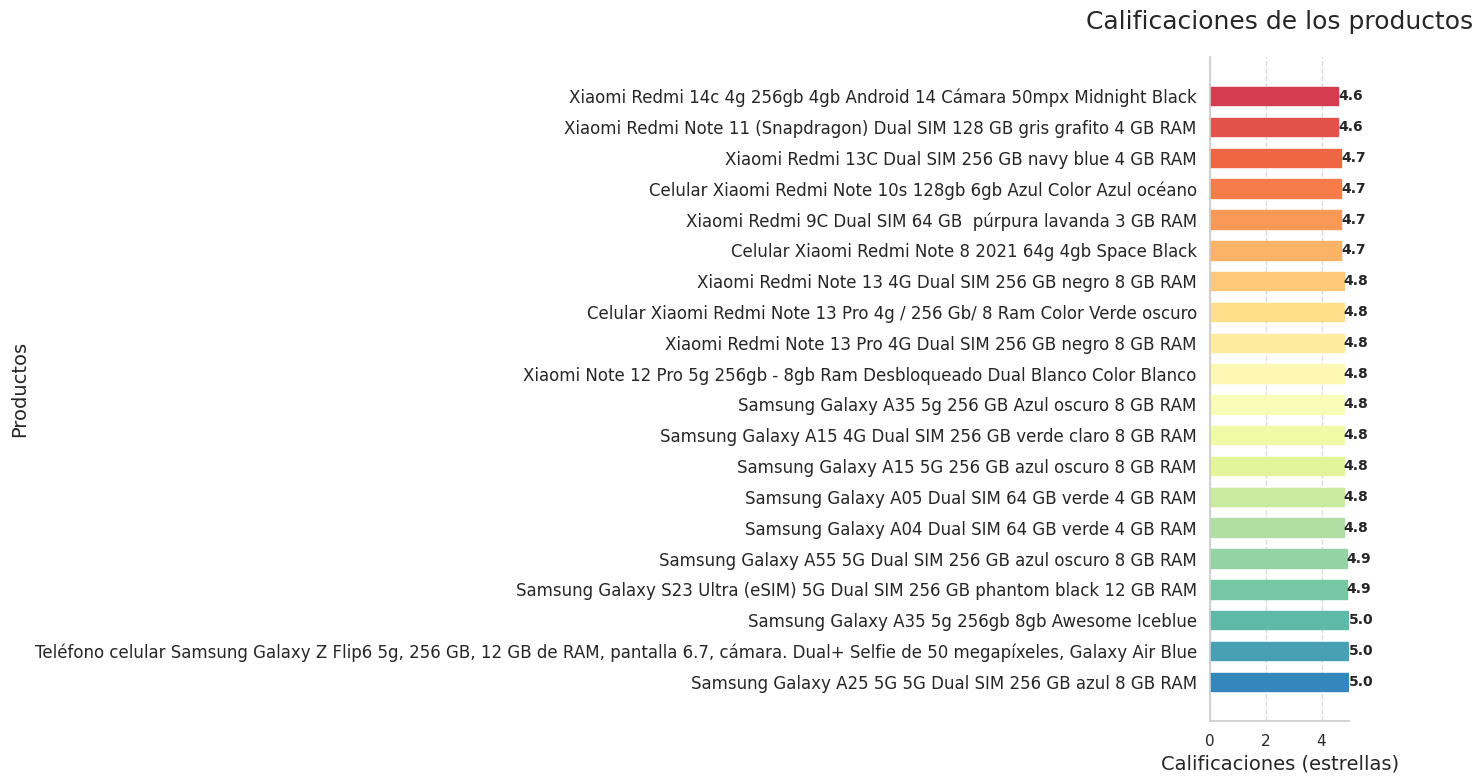

In [ ]:
# Convertir 'estrellas' a numérico
df['Estrellas'] = pd.to_numeric(df['Estrellas'], errors='coerce')

# Ordenar el dataframe por 'estrellas' en orden descendente
df_sorted = df.sort_values('Estrellas', ascending=True)

# Seleccionar los 10 productos
df_top = df_sorted.tail(20)

# Crear el gráfico
plt.figure(figsize=(14, 8))
bars = plt.barh(df_top['Nombre'], df_top['Estrellas'], height=0.6)

# Personalizar los colores
colors = plt.cm.Spectral(np.linspace(0.1, 0.9, len(df_top)))
for bar, color in zip(bars, colors):
    bar.set_color(color)

# Personalizar el gráfico
plt.title('Calificaciones de los productos', fontsize=18, pad=20)
plt.xlabel('Calificaciones (estrellas)', fontsize=14)
plt.ylabel('Productos', fontsize=14)
plt.xlim(0, 5)  # Establecer el límite del eje x de 0 a 5 estrellas
plt.gca().invert_yaxis()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Agregar líneas de cuadrícula
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Aumentar el tamaño de la fuente para los nombres de los productos
plt.yticks(fontsize=12)

# Agregar etiquetas de valor al final de cada barra
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, f'{width:.1f}',
             ha='left', va='center', fontsize=10, fontweight='bold')

# Ajustar el diseño
plt.tight_layout()

# Mostrar el gráfico
plt.show()

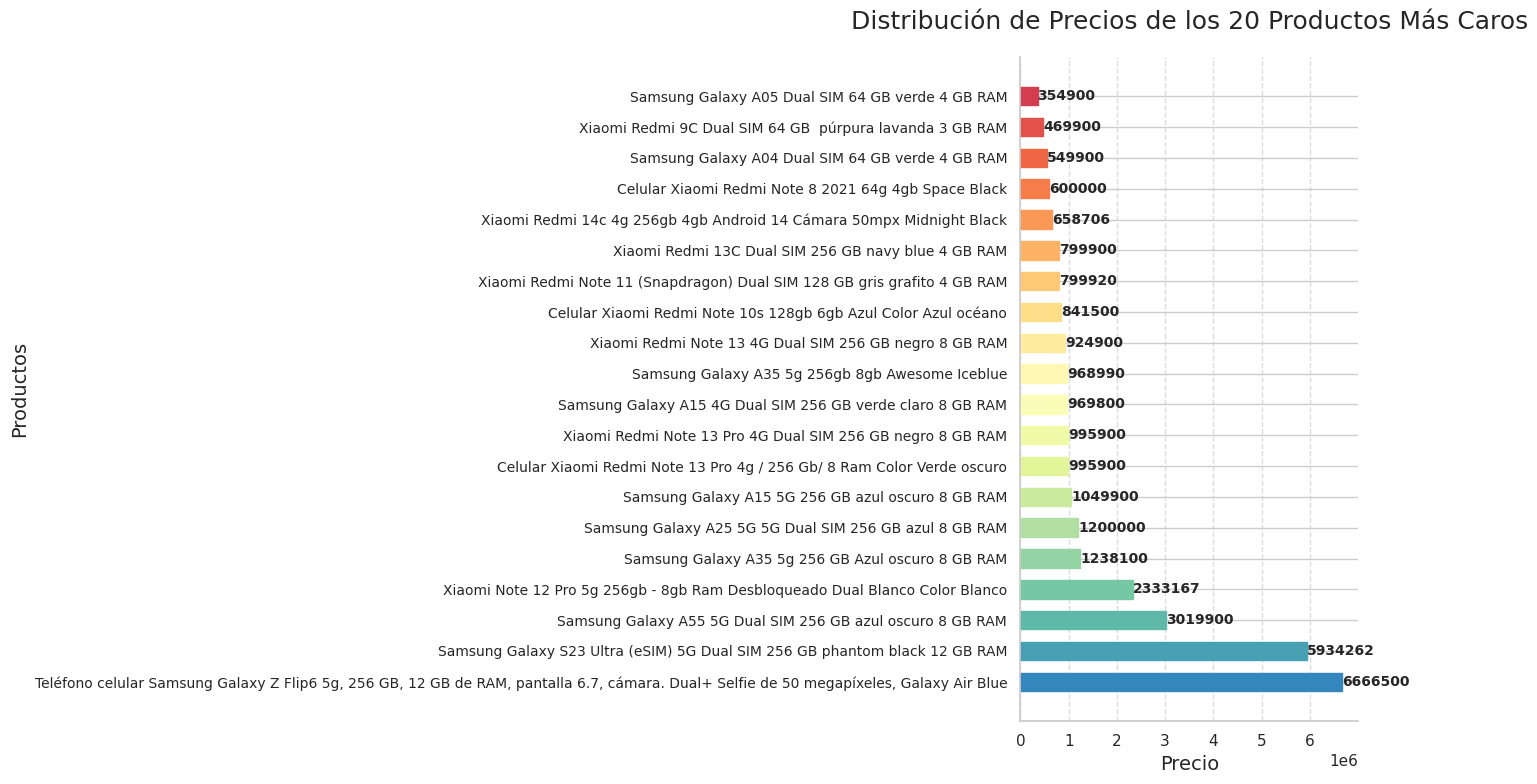

In [ ]:
# Leer el archivo CSV
df = pd.read_csv('productos_mercado_libre.csv')

# Limpiar la columna 'Precio'
def clean_price(price_str):
    try:
        return float(price_str.replace('$', '').replace('.', '').replace(',', '.'))
    except (ValueError, AttributeError):
        return np.nan

df['Precio'] = df['Precio'].astype(str).apply(clean_price)

# Eliminar filas con precios faltantes
df = df.dropna(subset=['Precio'])

# Ordenar el dataframe por precio en orden descendente
df_sorted = df.sort_values('Precio', ascending=True)

# Seleccionar los 20 productos
df_top = df_sorted.tail(20)

# Crear el gráfico
plt.figure(figsize=(14, 8))
bars = plt.barh(df_top['Nombre'], df_top['Precio'], height=0.6)

# Personalizar los colores
colors = plt.cm.Spectral(np.linspace(0.1, 0.9, len(df_top)))
for bar, color in zip(bars, colors):
    bar.set_color(color)

# Personalizar el gráfico
plt.title('Distribución de Precios de los 20 Productos Más Caros', fontsize=18, pad=20)
plt.xlabel('Precio', fontsize=14)
plt.ylabel('Productos', fontsize=14)
plt.gca().invert_yaxis()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Agregar líneas de cuadrícula
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Aumentar el tamaño de la fuente para los nombres de los productos
plt.yticks(fontsize=10)

# Agregar etiquetas de valor al final de cada barra
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, f'{width:.0f}',
             ha='left', va='center', fontsize=10, fontweight='bold')

# Ajustar el diseño
plt.tight_layout()

# Mostrar el gráfico
plt.show()

<ipython-input-70-bd315cd00bae>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  product_counts = df.groupby('Categoria Precio')['Nombre'].count()


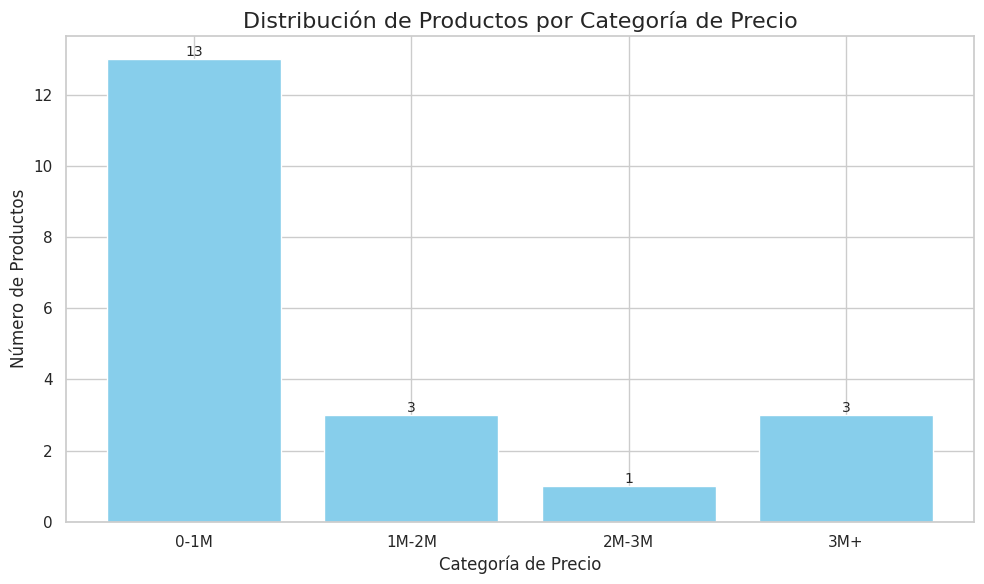

In [ ]:
# Eliminar el símbolo de moneda y las comas y, a continuación, convierta a flotante
df['Precio'] = df['Precio'].astype(str).str.replace(r'[^\d.]', '', regex=True)
df['Precio'] = pd.to_numeric(df['Precio'], errors='coerce')

# Definir categorías de precios
price_bins = [0, 1000000, 2000000, 3000000, float('inf')]
price_labels = ['0-1M', '1M-2M', '2M-3M', '3M+']
df['Categoria Precio'] = pd.cut(df['Precio'], bins=price_bins, labels=price_labels, right=False)

# Contar los productos de cada categoría
product_counts = df.groupby('Categoria Precio')['Nombre'].count()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(product_counts.index, product_counts.values, color='skyblue')

plt.title('Distribución de Productos por Categoría de Precio', fontsize=16)
plt.xlabel('Categoría de Precio', fontsize=12)
plt.ylabel('Número de Productos', fontsize=12)

# Añadir etiquetas de valor a las barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{height:.0f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

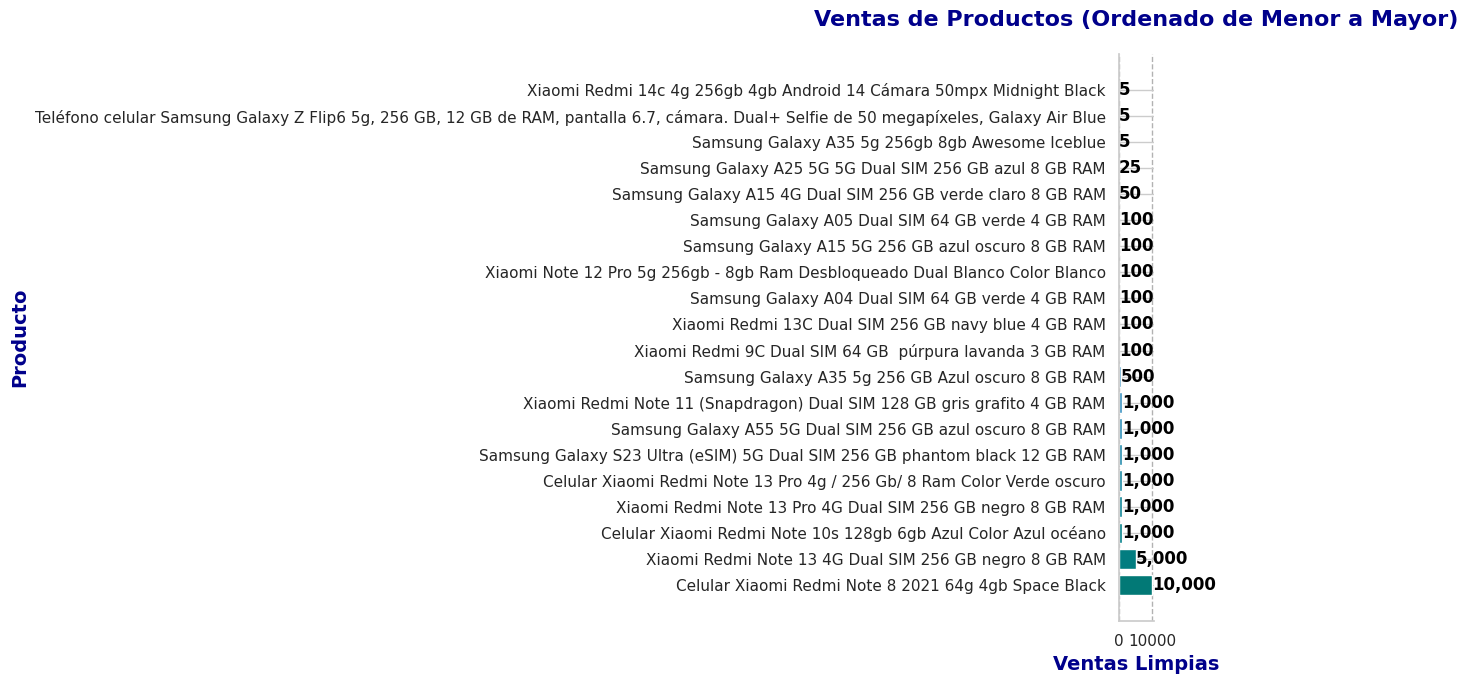

In [ ]:
# Ordenar el DataFrame por 'Ventas Limpias' en orden ascendente
df_sorted = df.sort_values('Ventas Limpias')

# Crear el gráfico de barras horizontales con diseño mejorado
plt.figure(figsize=(12, 7))
bars = plt.barh(
    df_sorted['Nombre'],
    df_sorted['Ventas Limpias'],
    color=plt.cm.PuBuGn(np.linspace(0.3, 0.8, len(df_sorted)))
)

# Personalizar el diseño
plt.xlabel('Ventas Limpias', fontsize=14, color='darkblue', fontweight='bold')
plt.ylabel('Producto', fontsize=14, color='darkblue', fontweight='bold')
plt.title('Ventas de Productos (Ordenado de Menor a Mayor)', fontsize=16, fontweight='bold', color='darkblue', pad=20)
plt.gca().invert_yaxis()

# Quitar líneas superior y derecha para un diseño más limpio
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Agregar líneas de cuadrícula para mayor claridad
plt.grid(axis='x', linestyle='--', alpha=0.6, color='gray')

# Etiquetas de valores al final de cada barra
for bar in bars:
    plt.text(
        bar.get_width() + 5,
        bar.get_y() + bar.get_height() / 2,
        f'{int(bar.get_width()):,}',
        ha='left',
        va='center',
        fontsize=12,
        color='black',
        fontweight='bold'
    )

# Ajustar el diseño para evitar superposición
plt.tight_layout()

# Mostrar el gráfico
plt.show()

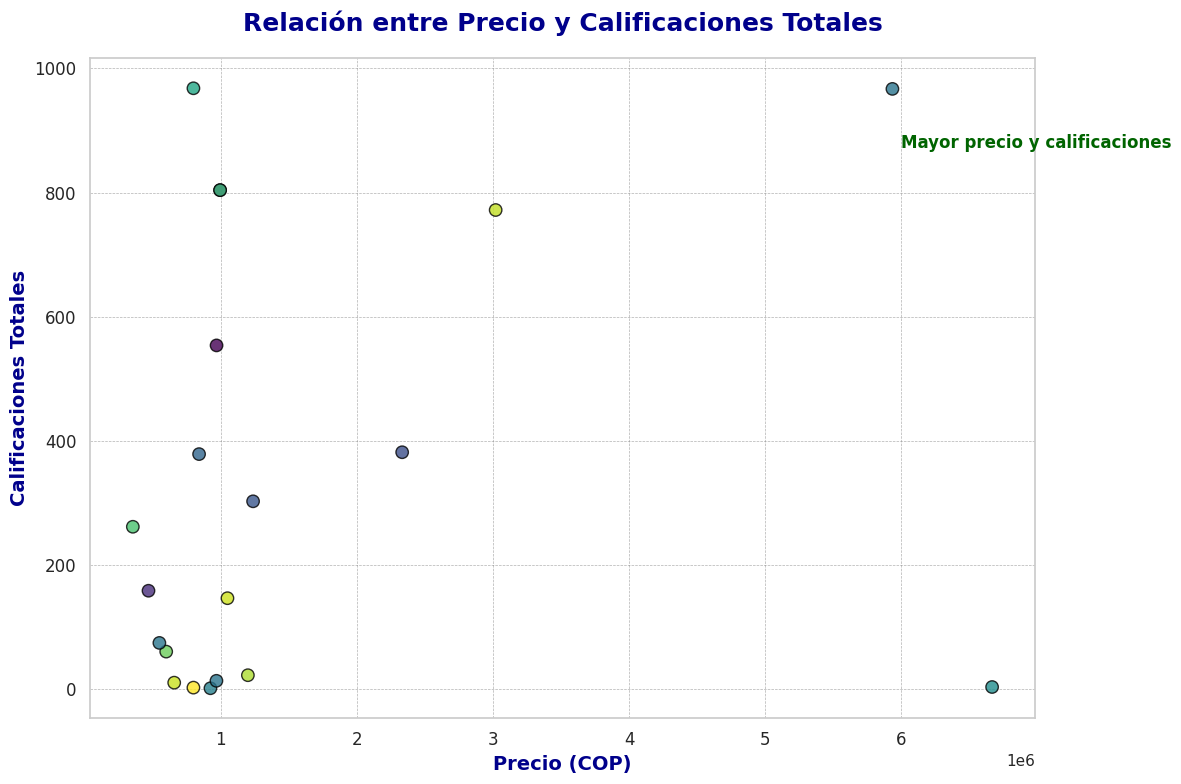

In [ ]:
# Crear un gráfico de dispersión
plt.figure(figsize=(12, 8))

# Generar colores únicos para cada punto
colors = np.random.rand(len(df))

# Crear el gráfico de dispersión
scatter = plt.scatter(
    df['Precio'],
    df['Calificaciones'],
    c=colors,
    cmap='viridis',
    edgecolor='black',
    s=80,
    alpha=0.8
)

# Personalizar el gráfico
plt.title('Relación entre Precio y Calificaciones Totales', fontsize=18, fontweight='bold', color='darkblue', pad=20)
plt.xlabel('Precio (COP)', fontsize=14, fontweight='bold', color='darkblue')
plt.ylabel('Calificaciones Totales', fontsize=14, fontweight='bold', color='darkblue')

# Agregar una cuadrícula más discreta
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.6, color='gray')

# Formatear los ejes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Agregar anotaciones al gráfico
plt.text(
    df['Precio'].max() * 0.9,
    df['Calificaciones'].max() * 0.9,
    'Mayor precio y calificaciones',
    fontsize=12,
    color='darkgreen',
    fontweight='bold'
)

# Ajustar el diseño para evitar superposición
plt.tight_layout()

# Mostrar el gráfico
plt.show()

<ipython-input-77-fe0467f467a2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Nombre', y='Calificaciones', data=df, palette='viridis')
<ipython-input-77-fe0467f467a2>:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


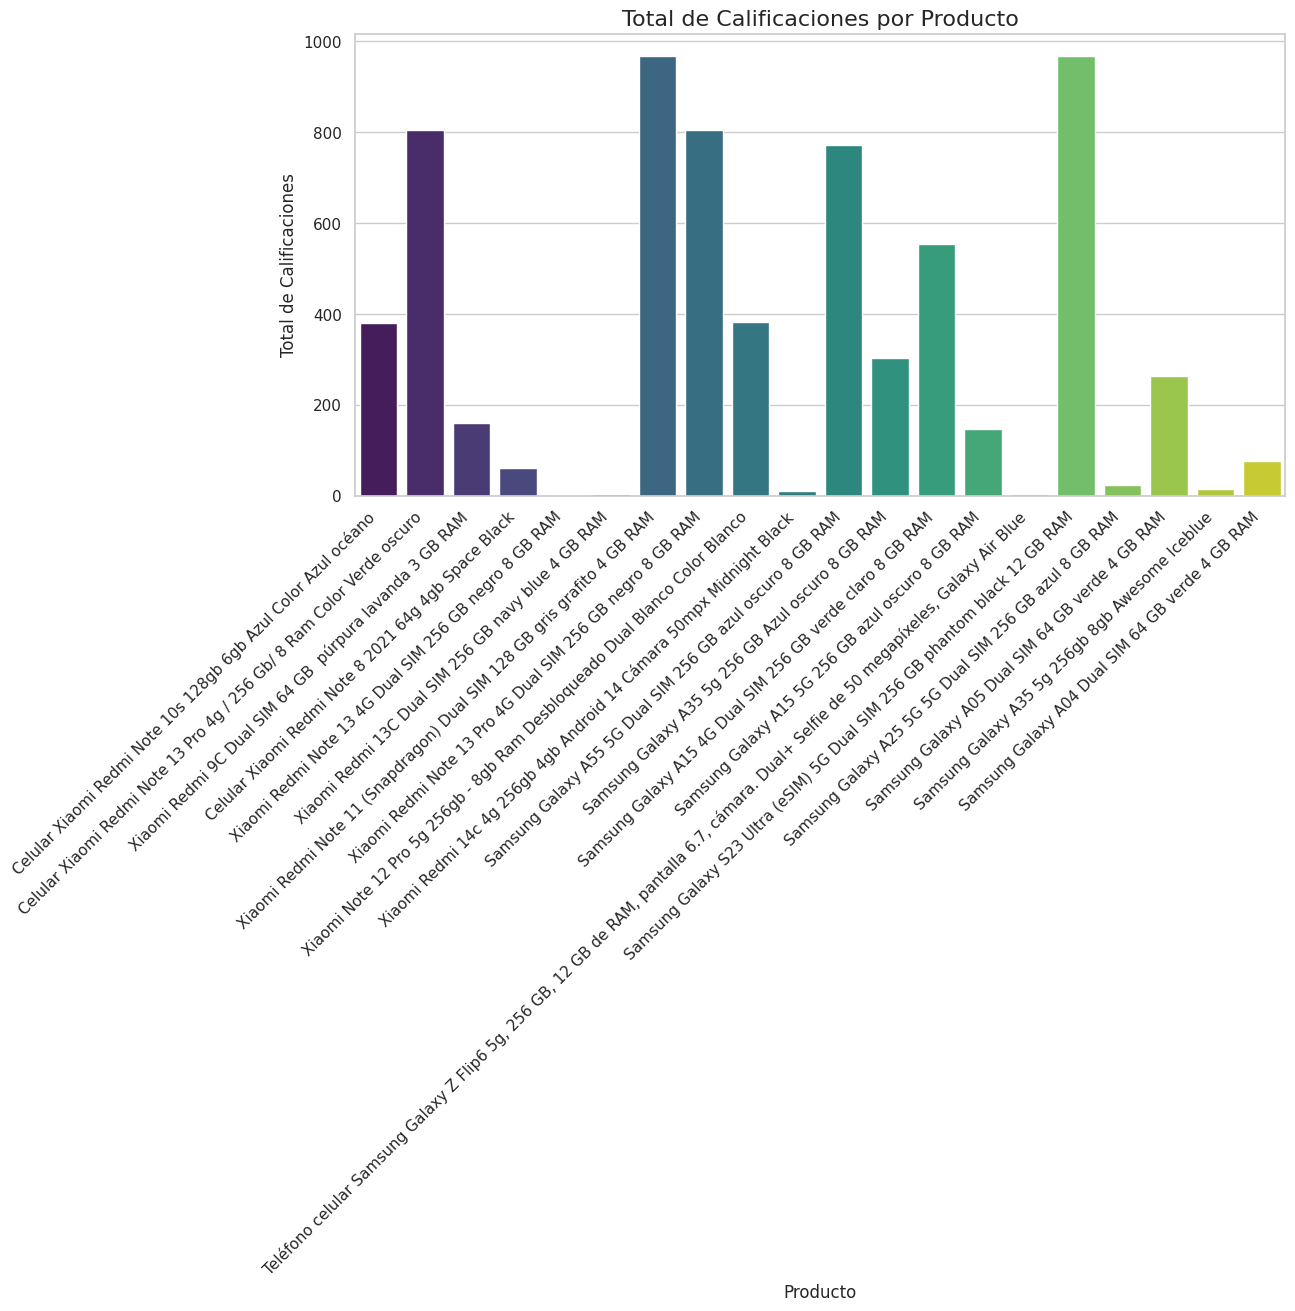

In [ ]:
# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x='Nombre', y='Calificaciones', data=df, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Total de Calificaciones por Producto', fontsize=16)
plt.xlabel('Producto', fontsize=12)
plt.ylabel('Total de Calificaciones', fontsize=12)
plt.tight_layout()
plt.show()

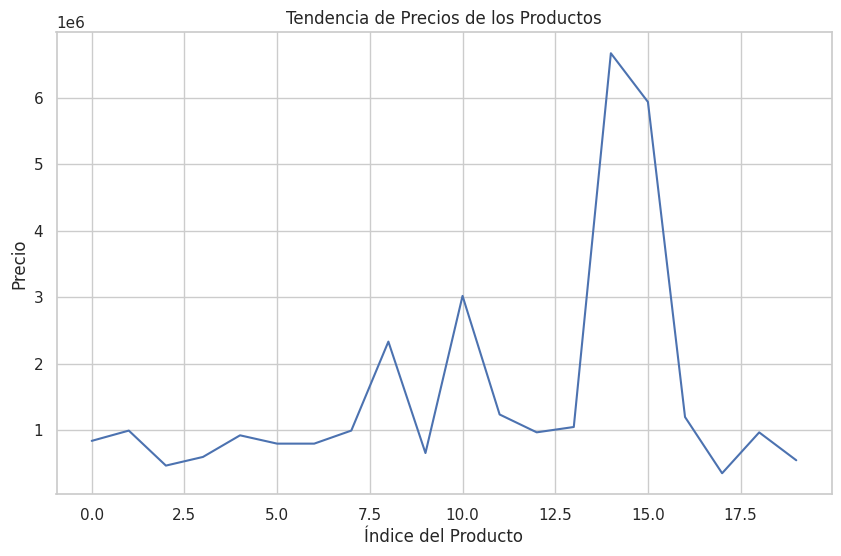

In [ ]:
# Gráfico de tendencia de precios
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x=df.index, y='Precio')
plt.title('Tendencia de Precios de los Productos')
plt.xlabel('Índice del Producto')
plt.ylabel('Precio')
plt.show()

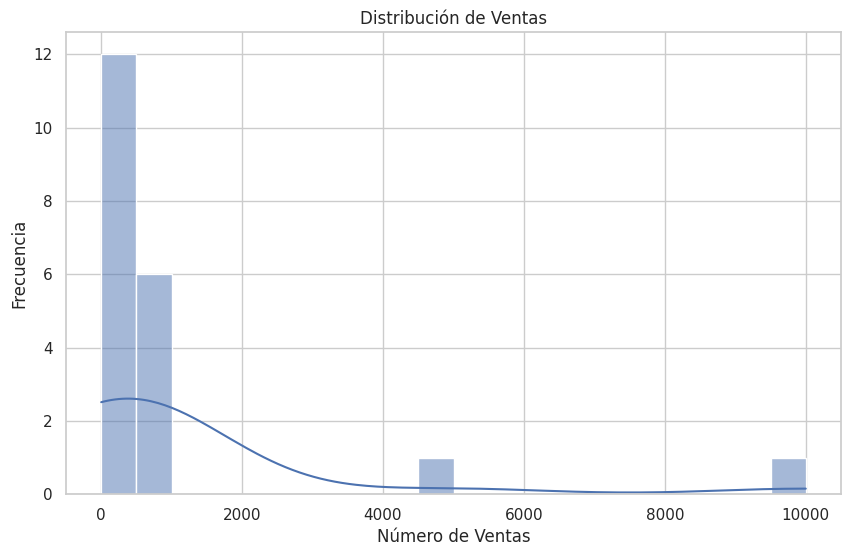

In [ ]:
# Gráfico de distribución de ventas
plt.figure(figsize=(10, 6))
sns.histplot(df['Ventas Limpias'], bins=20, kde=True)
plt.title('Distribución de Ventas')
plt.xlabel('Número de Ventas')
plt.ylabel('Frecuencia')
plt.show()

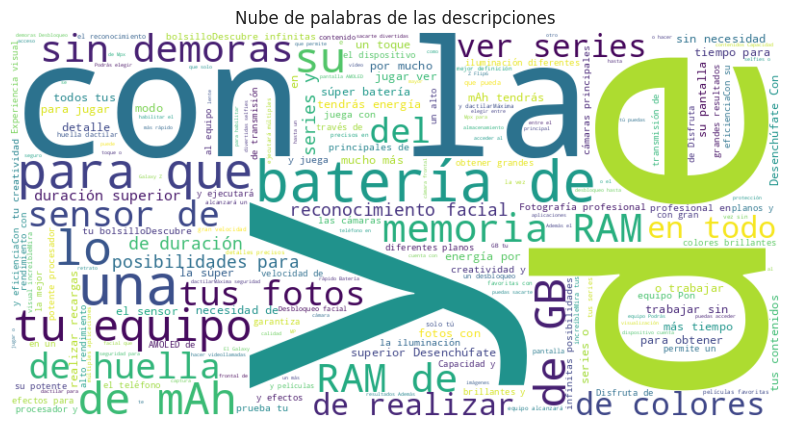

In [ ]:
# Obtener todas las descripciones
descripciones = df['Descripción'].tolist()

# Unir todas las descripciones en un solo texto
texto_descripciones = ' '.join(descripciones)

# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto_descripciones)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de palabras de las descripciones')
plt.show()